In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
!pip3 install xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# importing the dataset
df = pd.read_csv("DS - Assignment Part 1 data set.csv")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
# Getting the dataset information
print("="*80)
print("First Five Rows ","\n")
print(df.head(),"\n")
      
print("="*80)
print("Information About Dataset","\n")
print(df.info(),"\n")  

print("="*80)
print("Describe the Dataset","\n")
print(df.describe(),"\n")  
      
print("="*80)
print("Null values ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

   Transaction date  House Age  Distance from nearest Metro station (km)  \
0          2012.917       32.0                                  84.87882   
1          2012.917       19.5                                 306.59470   
2          2013.583       13.3                                 561.98450   
3          2013.500       13.3                                 561.98450   
4          2012.833        5.0                                 390.56840   

   Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   

   House size (sqft)  House price of unit area  
0                5

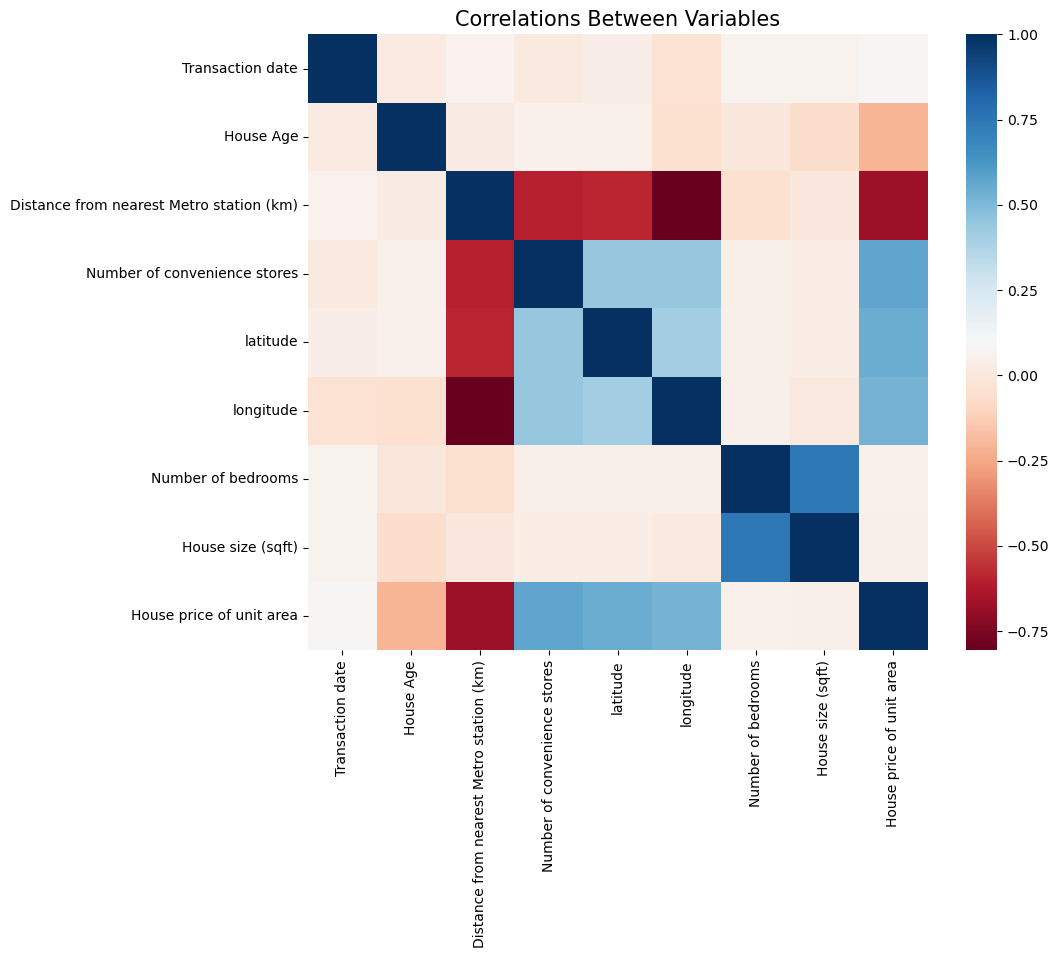

In [5]:
#Visualizing the correlations between numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [6]:
#Feature Selection
important_cols = ["House Age","Distance from nearest Metro station (km)",
                  "Number of convenience stores","latitude","longitude",
                  "Number of bedrooms","House size (sqft)","House price of unit area"]

df = df[important_cols]

In [7]:
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


<Figure size 1000x800 with 0 Axes>

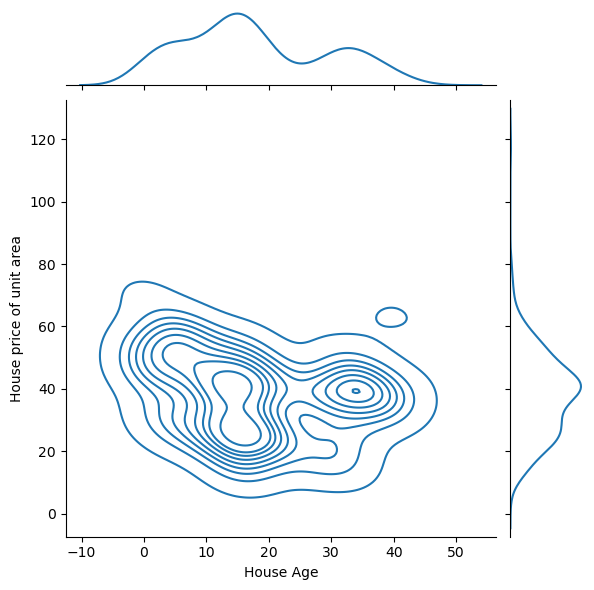

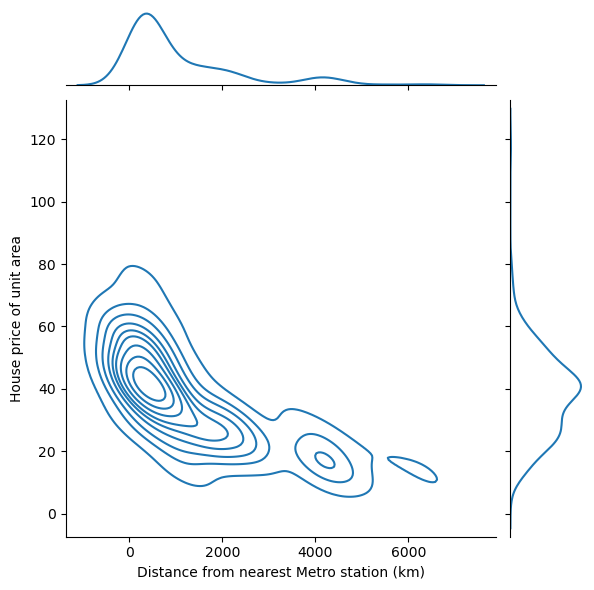

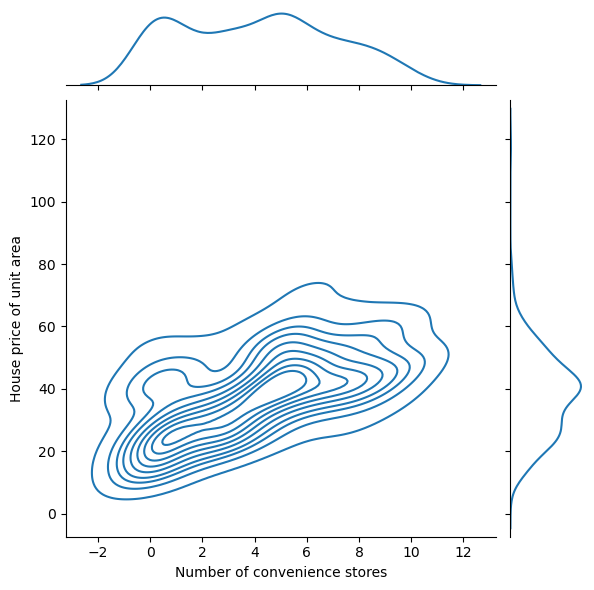

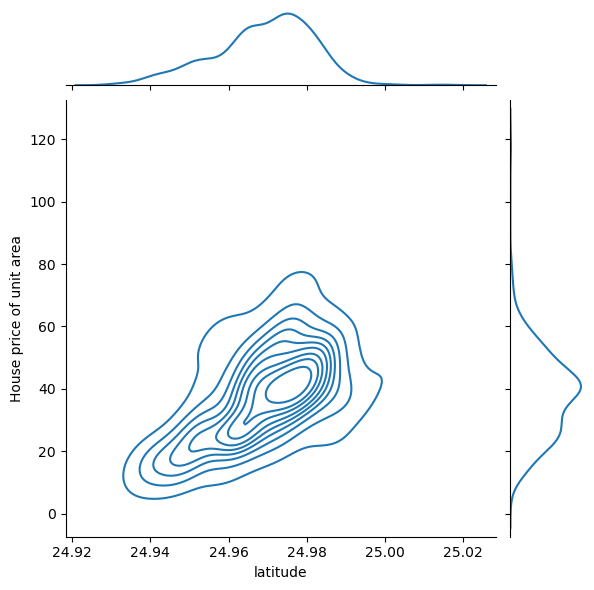

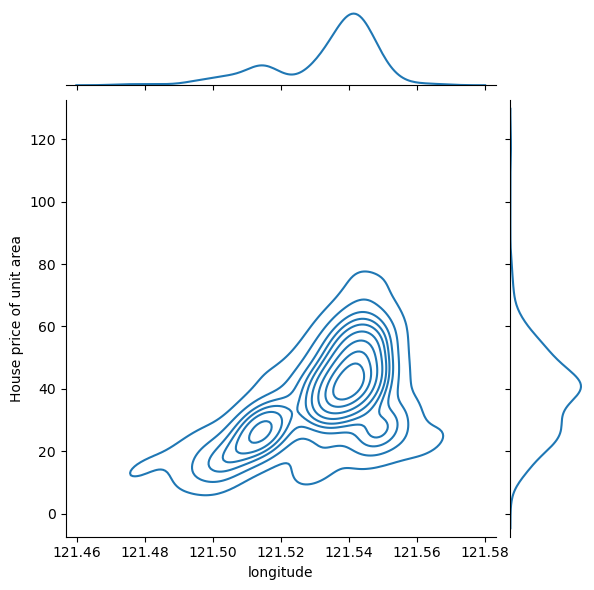

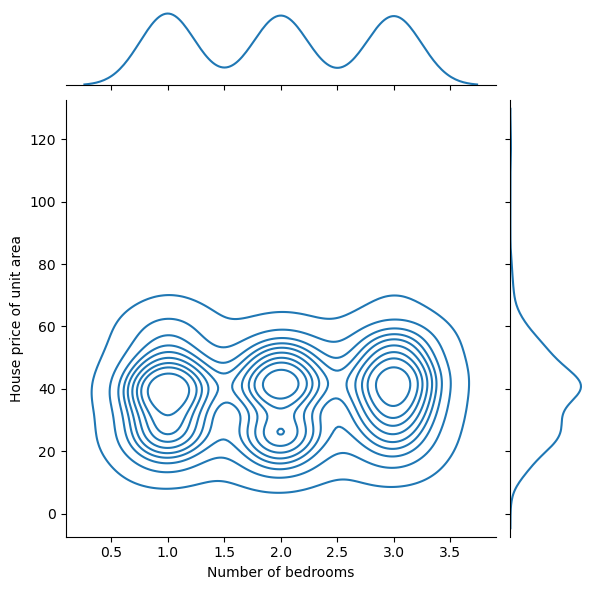

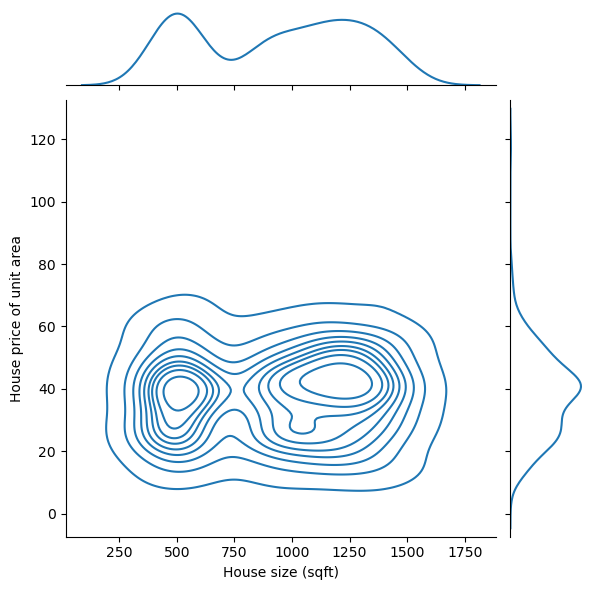

In [8]:
#Visualizing the Correlation between each column and the target variable using jointplot visualization

plt.figure(figsize=(10,8))
sns.jointplot(x=df["House Age"], y=df["House price of unit area"], kind="kde")
sns.jointplot(x=df["Distance from nearest Metro station (km)"], y=df["House price of unit area"], kind="kde")
sns.jointplot(x=df["Number of convenience stores"], y=df["House price of unit area"], kind="kde")
sns.jointplot(x=df["latitude"], y=df["House price of unit area"], kind="kde")
sns.jointplot(x=df["longitude"], y=df["House price of unit area"], kind="kde")
sns.jointplot(x=df["Number of bedrooms"], y=df["House price of unit area"], kind="kde")
sns.jointplot(x=df["House size (sqft)"], y=df["House price of unit area"], kind="kde")

plt.show()

In [9]:
# spliting the dataset
x = df.drop("House price of unit area", axis=1)
y = df["House price of unit area"]

In [10]:
#Splitting the data into Train and Test chunks for better evaluation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [12]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [13]:
accuracy =  pd.DataFrame(columns=["Model","Score"])

## Linear Regression

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
predictions = lin_reg.predict(x_test)

score = lin_reg.score(x_test,y_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)
print("Model Score:", score)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

new_row1 = {"Model": "LinearRegression","Score": score}
accuracy = accuracy.append(new_row1, ignore_index=True)

MAE: 5.4033204738846115
MSE: 56.88408234891598
RMSE: 7.542153694331347
R2 Score: 0.6609193551671766
------------------------------
RMSE Cross-Validation: 8.869225536451841
Model Score: 0.6609193551671766


## Ridge Regression

In [15]:
ridge = Ridge()
ridge.fit(x_train, y_train)
predictions = ridge.predict(x_test)

score1 = ridge.score(x_test,y_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)
print("Model Score:", score1)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

new_row1 = {"Model": "Ridge","Score": score1}
accuracy = accuracy.append(new_row1, ignore_index=True)

MAE: 5.692146033053506
MSE: 61.193109564642725
RMSE: 7.822602480290222
R2 Score: 0.6352336507209194
------------------------------
RMSE Cross-Validation: 9.153555708208847
Model Score: 0.6352336507209194


## Lasso Regression

In [16]:
lasso = Lasso()
lasso.fit(x_train, y_train)
predictions = lasso.predict(x_test)

score2 = lasso.score(x_test,y_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)
print("Model Score:", score2)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

new_row1 = {"Model": "Lasso","Score": score2}
accuracy = accuracy.append(new_row1, ignore_index=True)

MAE: 5.751542271716094
MSE: 62.34569409860398
RMSE: 7.895928957292105
R2 Score: 0.6283632031218405
------------------------------
RMSE Cross-Validation: 9.164798925575294
Model Score: 0.6283632031218405


## Elastic Net

In [17]:
elastic_net = ElasticNet()
elastic_net.fit(x_train, y_train)
predictions = elastic_net.predict(x_test)

score3 = elastic_net.score(x_test,y_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)
print("Model Score:", score3)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

new_row1 = {"Model": "ElasticNet","Score": score3}
accuracy = accuracy.append(new_row1, ignore_index=True)

MAE: 5.749215011860645
MSE: 62.3727760214348
RMSE: 7.897643700587841
R2 Score: 0.6282017703364706
------------------------------
RMSE Cross-Validation: 9.16484431552098
Model Score: 0.6282017703364706


## Support Vector Machines

In [18]:
svr = SVR(C=100000)
svr.fit(x_train, y_train)
predictions = svr.predict(x_test)

score4 = svr.score(x_test,y_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)
print("Model Score:", score4)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

new_row1 = {"Model": "SVR","Score": score4}
accuracy = accuracy.append(new_row1, ignore_index=True)

MAE: 6.2920837527305595
MSE: 135.74925524297757
RMSE: 11.651148237104254
R2 Score: 0.19081150468376074
------------------------------
RMSE Cross-Validation: 9.352464010009706
Model Score: 0.19081150468376074


## Random Forest Regressor

In [19]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)

score5 = random_forest.score(x_test,y_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)
print("Model Score:", score5)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

new_row1 = {"Model": "RandomForestRegressor","Score": score5}
accuracy = accuracy.append(new_row1, ignore_index=True)

MAE: 4.062638554216866
MSE: 35.007464975903595
RMSE: 5.91671065507716
R2 Score: 0.7913238061013024
------------------------------
RMSE Cross-Validation: 7.737475894575667
Model Score: 0.7913238061013024


## XGBoost Regressor

In [20]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)

score6 = xgb.score(x_test,y_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)
print("Model Score:", score6)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

new_row1 = {"Model": "XGBRegressor","Score": score6}
accuracy = accuracy.append(new_row1, ignore_index=True)

MAE: 4.346893960883818
MSE: 38.81940691754239
RMSE: 6.2305222026361795
R2 Score: 0.7686011800473586
------------------------------
RMSE Cross-Validation: 7.813989009860452
Model Score: 0.7686011800473586


## Polynomial Regression (Degree = 2)

In [21]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(x_train)
X_test_2d = poly_reg.transform(x_test)

#score7 = poly_reg.score(x_test,y_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)
#print("Model Score:", score7)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

#new_row1 = {"Model": "Polynomial","Score": score7}
#accuracy = accuracy.append(new_row1, ignore_index=True)

MAE: 5.276067867731474
MSE: 49.77247501198579
RMSE: 7.054961021294575
R2 Score: 0.7033109751429197
------------------------------
RMSE Cross-Validation: 8.869225536451841


## Model Comparison

The less the Root Mean Squared Error (RMSE), The better the model is.

In [22]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,RandomForestRegressor,4.062639,35.007465,5.916711,0.791324,7.737476
6,XGBRegressor,4.346894,38.819407,6.230522,0.768601,7.813989
0,LinearRegression,5.403320,56.884082,7.542154,0.660919,8.869226
7,Polynomial Regression (degree=2),5.276068,49.772475,7.054961,0.703311,8.869226
1,Ridge,5.692146,61.193110,7.822602,0.635234,9.153556
2,Lasso,5.751542,62.345694,7.895929,0.628363,9.164799
3,ElasticNet,5.749215,62.372776,7.897644,0.628202,9.164844
4,SVR,6.292084,135.749255,11.651148,0.190812,9.352464


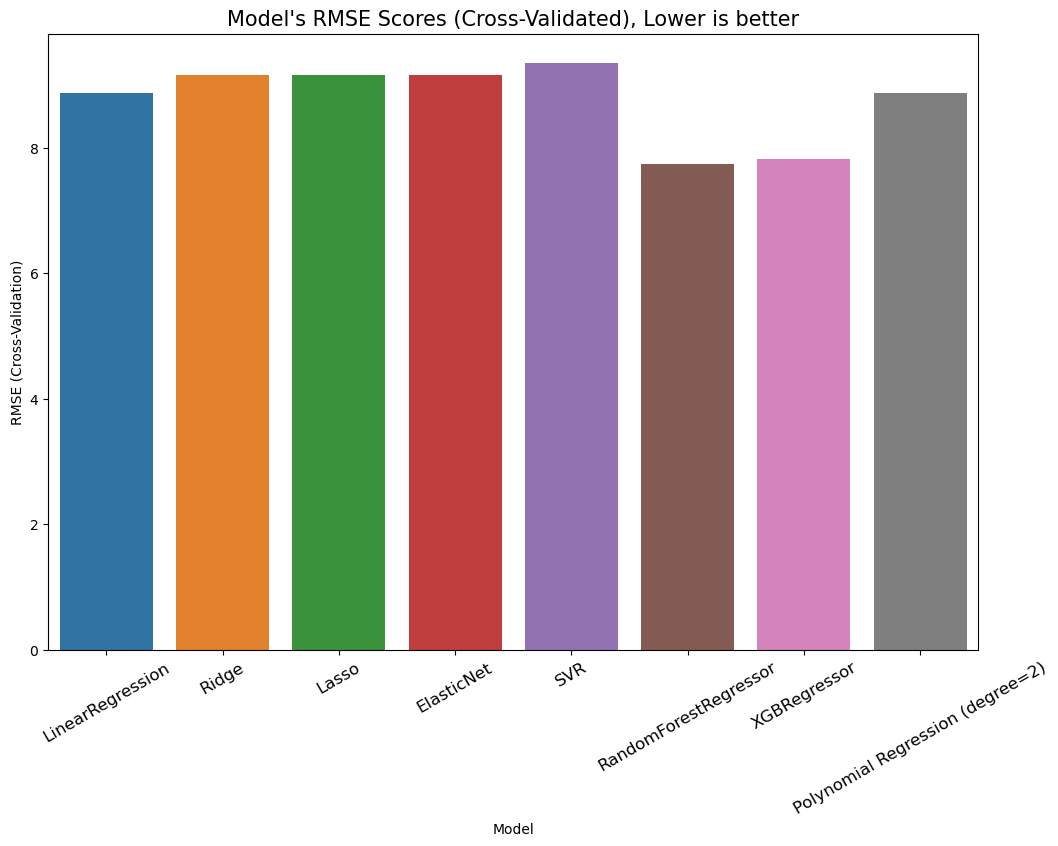

In [23]:
#Models' RMSE Scores (Cross-Validated)
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Model's RMSE Scores (Cross-Validated), Lower is better", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

In [24]:
accuracy.sort_values(by="Score")

,Model,Score
4,SVR,0.190812
3,ElasticNet,0.628202
2,Lasso,0.628363
1,Ridge,0.635234
0,LinearRegression,0.660919
6,XGBRegressor,0.768601
5,RandomForestRegressor,0.791324


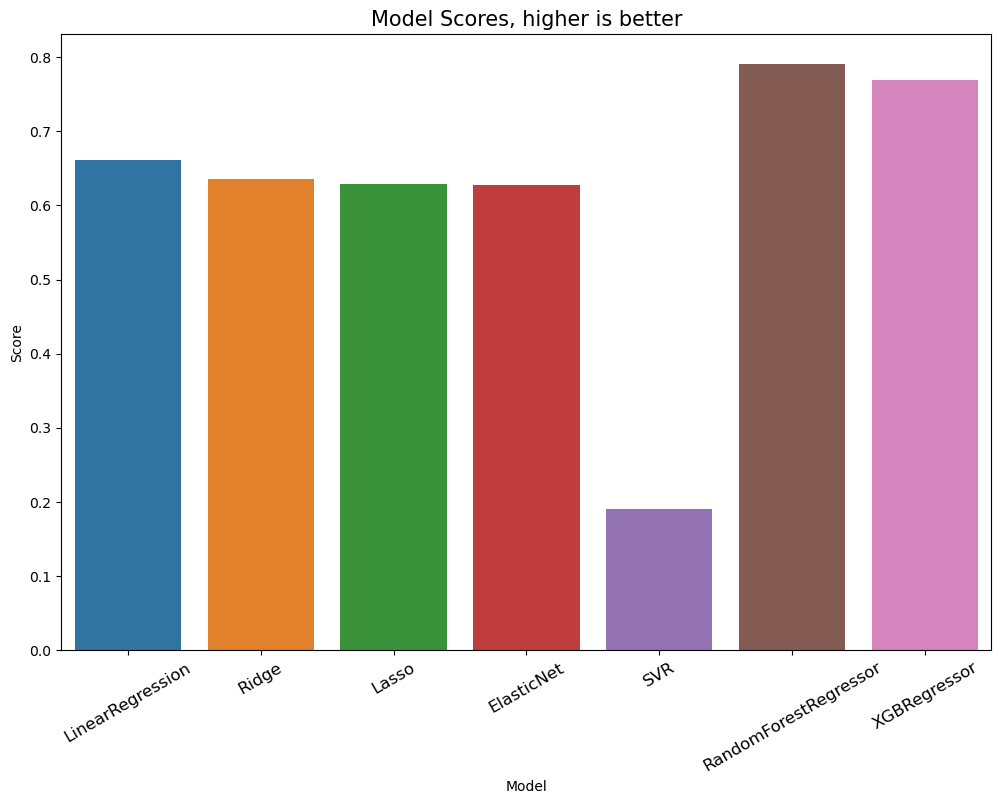

In [25]:
#Model Scores 
plt.figure(figsize=(12,8))
sns.barplot(x=accuracy["Model"], y=accuracy["Score"])
plt.title("Model Scores, higher is better", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

## Recommended Model - Random Forest Regressor